In [1]:
import numpy as np
import matplotlib.pyplot as plt

# x方向
def euler_method_2ord_x(t0, v0, y0, tmax, n=12):
    # t0~tmaxを(2**n+1)*4個に分割
    t = np.linspace(t0, tmax, (2**n + 1)*4)
    
    # tの刻み幅Δt
    dt = t[1] - t[0]
    
    # tと同じ形状の未初期化配列を生成
    v = np.empty_like(t)
    y = np.empty_like(t)
    
    # v[0]に初期値y0を代入
    v[0] = v0
    y[0] = y0
    
    # オイラー法でt毎の数値解を計算
    for k in range(len(t) - 1):
        v[k+1] = v[k]
        y[k+1] = y[k] + v[k] * dt
    
    return t, v, y

# y方向
def euler_method_2ord_y(t0, v0, y0, tmax, n=12):
    # t0~tmaxを(2**n+1)*4個に分割
    t = np.linspace(t0, tmax, (2**n + 1)*4)
    
    # tの刻み幅Δt
    dt = t[1] - t[0]
    
    # tと同じ形状の未初期化配列を生成
    v = np.empty_like(t)
    y = np.empty_like(t)
    
    # v[0]に初期値y0を代入
    v[0] = v0
    y[0] = y0
    
    # 地球の重力加速度
    g = 9.8
    
    # オイラー法でt毎の数値解を計算
    for k in range(len(t) - 1):
        v[k+1] = v[k] - g * dt
        y[k+1] = y[k] + v[k] * dt
    
    return t, v, y

# 投射関数
# t0:初期時刻
# v0:初速度の絶対値
# r0:投射地点の座標
# theta:仰角
# g:重力加速度
def projectile_motion(t0, v0, r0, tmax, theta, n=12):
    # 初速度のx成分とy成分
    vx0 = v0 * np.cos(theta)
    vy0 = v0 * np.sin(theta)
    
    # 投射地点の座標
    x0 = r0[0]
    y0 = r0[1]
    
    # x方向の運動方程式をオイラー法で解く
    t, vx, x = euler_method_2ord_x(t0, vx0, x0, tmax, n=n)
    
    # y方向の運動方程式をオイラー法で解く
    t, vy, y = euler_method_2ord_y(t0, vy0, y0, tmax, n=n)
    
    return t, x, y, vx, vy

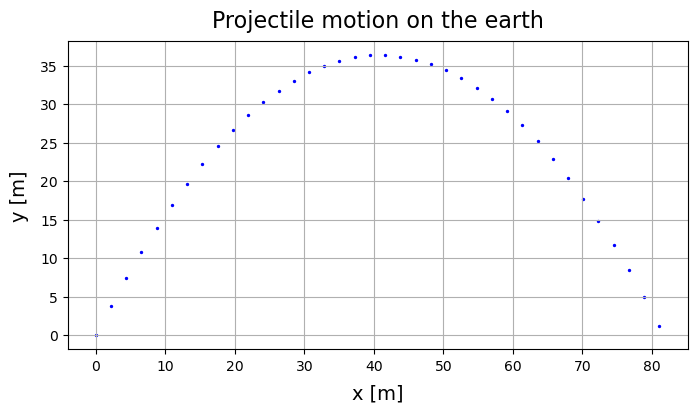

In [3]:
# 初期時刻
t0 = 0

# 初速度の絶対値
v0 = 30

# 投射地点の座標
r0 = (0,0)

# 時刻の最大値
tmax = 150

# 投射角度(0°)
theta = np.pi / 3

# スライスでt,x,yのデータを取得
t, x, y = projectile_motion(t0, v0, r0, tmax, theta, n=8)[0:3]

# y>0のデータを抽出
t, x, y = t[y >= 0], x[y >= 0], y[y >= 0]

# 斜方投射された物体の軌道を散布図にプロット
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Projectile motion on the earth", fontsize=16, pad=10)
ax.grid()
ax.set_xlabel("x [m]", fontsize=14, labelpad=8)
ax.set_ylabel("y [m]", fontsize=14, labelpad=8)
ax.scatter(x, y, color="blue", s=2)